# Prevent Overfitting 
## Michael Jones
### Deep Learning

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


In [3]:
# Load data
x_train_original = np.loadtxt('mnist_training.csv', delimiter=',') / 255
y_train_original = np.loadtxt('mnist_train_class.csv', delimiter=',').astype(int)
x_test = np.loadtxt('mnist_testing.csv', delimiter=',') / 255
y_test = np.loadtxt('mnist_test_class.csv', delimiter=',').astype(int)

# Subsample the training set
x_train_small, _, y_train_small, _ = train_test_split(x_train_original, y_train_original, test_size=0.9, random_state=42)

print(x_train_small.shape) 
print(y_train_small.shape)


(6000, 784)
(6000,)


In [4]:
def plotHistory(history):
    plt.figure(figsize=(12, 4))

     # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.tight_layout()
    plt.show()

## Model 1

### Model 1 Baseline

In [7]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],)))
model1.add(Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint('best_model_baseline.keras', monitor='val_loss', save_best_only=True, verbose=0)

Tuning_model1 = model1.fit(
    x_train_small, y_train_small,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint]
)


C:\Users\mrj13\anaconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3363 - loss: 2.0686 - val_accuracy: 0.7458 - val_loss: 1.0278
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7834 - loss: 0.9000 - val_accuracy: 0.8325 - val_loss: 0.6776
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.6459 - val_accuracy: 0.8375 - val_loss: 0.5623
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.5301 - val_accuracy: 0.8383 - val_loss: 0.5214
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - loss: 0.4698 - val_accuracy: 0.8633 - val_loss: 0.4579
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.4797 - val_accuracy: 0.8692 - val_loss: 0.4338
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8746 - loss: 0.4139 - val_accuracy: 0.8758 - val_loss: 0.4282
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8896 - loss: 0.3755 - val_accuracy: 0.8825 - v

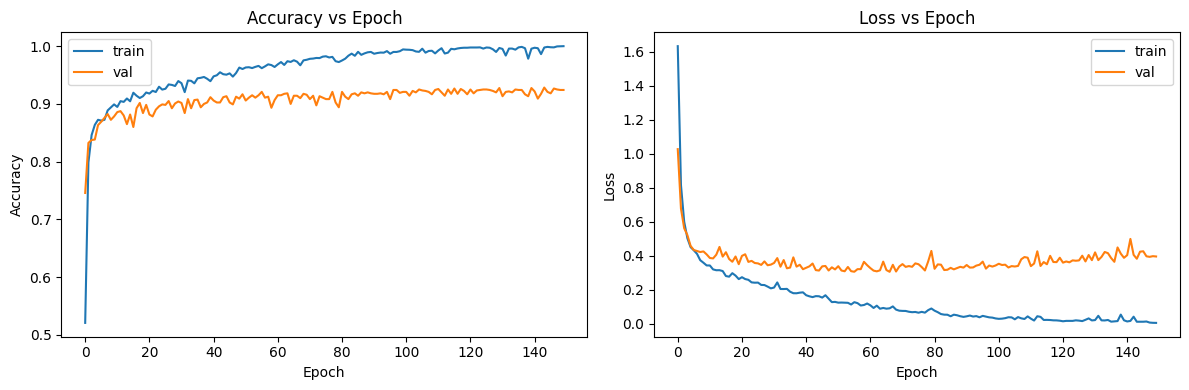

In [8]:
plotHistory(Tuning_model1)

###  Model 1 with Dropout

In [10]:
model1_dropout = Sequential()
model1_dropout.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],)))
model1_dropout.add(Dropout(0.25))
model1_dropout.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model1_dropout.keras', monitor='val_loss', verbose=0, save_best_only=True)

model1_dropout.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model1_dropout = model1_dropout.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)
         

Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2603 - loss: 2.2346 - val_accuracy: 0.7058 - val_loss: 1.3369
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5910 - loss: 1.3343 - val_accuracy: 0.8192 - val_loss: 0.9002
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6946 - loss: 0.9948 - val_accuracy: 0.8225 - val_loss: 0.7334
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7275 - loss: 0.8576 - val_accuracy: 0.8283 - val_loss: 0.6539
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7613 - loss: 0.7711 - val_accuracy: 0.8650 - val_loss: 0.5504
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.6739 - val_accuracy: 0.8575 - val_loss: 0.5225
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7968 - loss: 0.6629 - val_accuracy: 0.8708 - val_loss: 0.4882
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.6259 - val_accuracy: 0.8650 - v

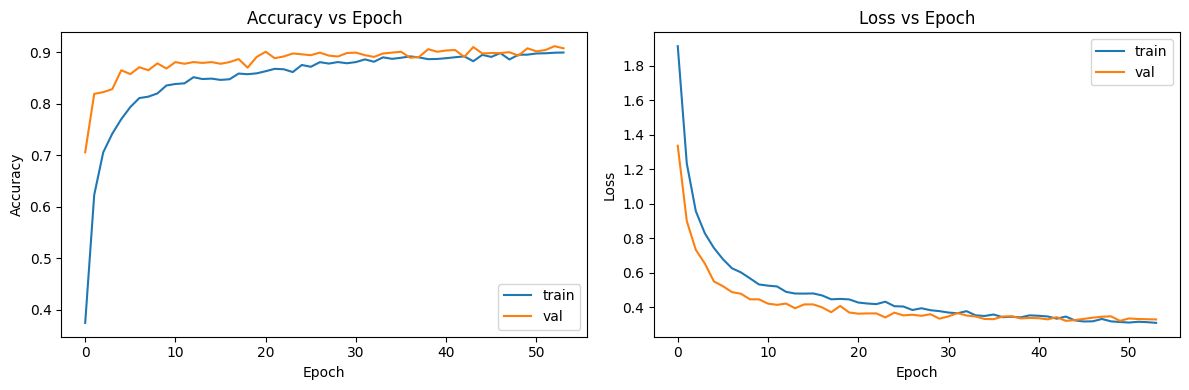

In [105]:
plotHistory(Tuning_model1_dropout)

###  Model 1 with L1

In [13]:
model1_L1 = Sequential()
model1_L1.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],),
                   kernel_regularizer=regularizers.l1(0.001)))
model1_L1.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model1_L1.keras', monitor='val_loss', verbose=0, save_best_only=True)


model1_L1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])


Tuning_model1_L1 = model1_L1.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3756 - loss: 4.7534 - val_accuracy: 0.7692 - val_loss: 2.8811
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 2.7226 - val_accuracy: 0.8250 - val_loss: 2.2768
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 2.2299 - val_accuracy: 0.8450 - val_loss: 1.9696
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8411 - loss: 1.9096 - val_accuracy: 0.8525 - val_loss: 1.7379
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8577 - loss: 1.6775 - val_accuracy: 0.8400 - val_loss: 1.5904
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 1.5194 - val_accuracy: 0.8550 - val_loss: 1.4484
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8807 - loss: 1.3784 - val_accuracy: 0.8625 - val_loss: 1.3154
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8534 - loss: 1.3034 - val_accuracy: 0.8642 - v

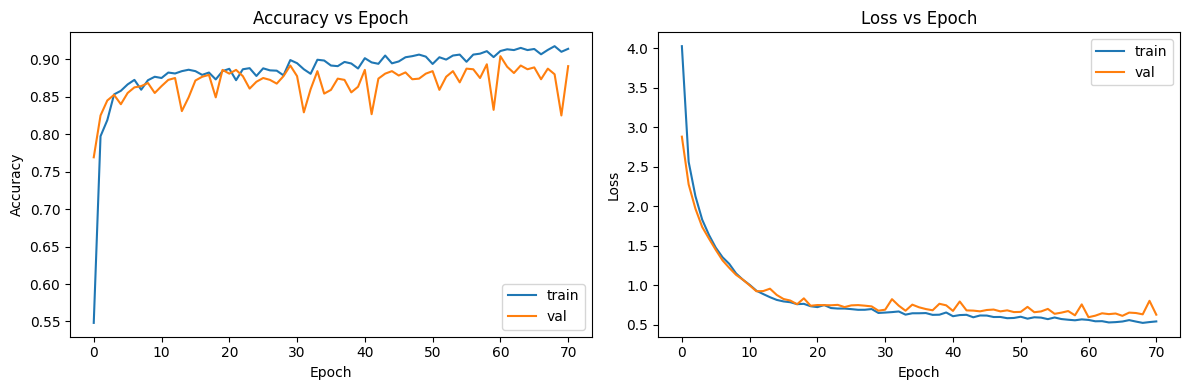

In [14]:
plotHistory(Tuning_model1_L1)

###  Model 1 with L2

In [16]:
model1_L2 = Sequential()
model1_L2.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],),
                   kernel_regularizer=regularizers.l2(0.001)))
model1_L2.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model1_L2.keras', monitor='val_loss', verbose=0, save_best_only=True)


model1_L2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])


Tuning_model1_L2 = model1_L2.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3241 - loss: 2.3304 - val_accuracy: 0.6983 - val_loss: 1.3312
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 1.1981 - val_accuracy: 0.7900 - val_loss: 0.9390
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.8566 - val_accuracy: 0.8283 - val_loss: 0.7211
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8367 - loss: 0.6968 - val_accuracy: 0.8600 - val_loss: 0.6314
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8604 - loss: 0.6253 - val_accuracy: 0.8675 - val_loss: 0.5881
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8816 - loss: 0.5451 - val_accuracy: 0.8575 - val_loss: 0.5847
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8746 - loss: 0.5475 - val_accuracy: 0.8658 - val_loss: 0.5609
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8891 - loss: 0.4922 - val_accuracy: 0.8825 - v

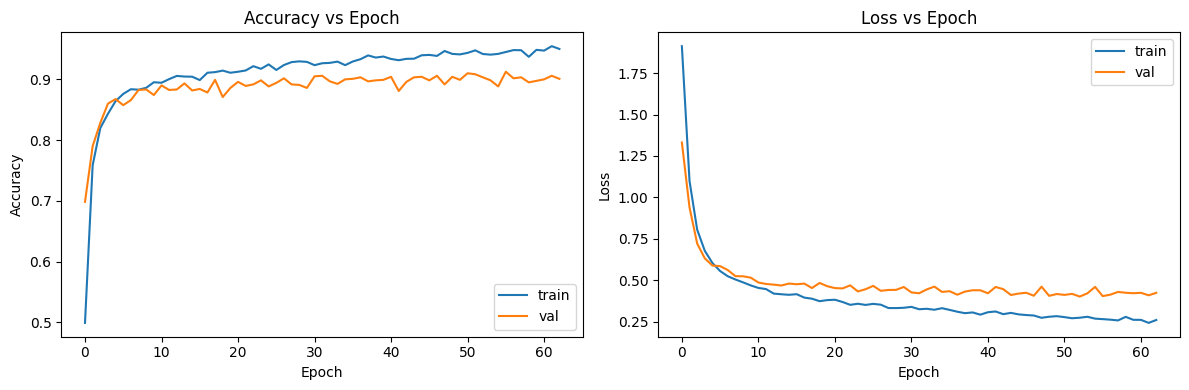

In [17]:
plotHistory(Tuning_model1_L2)

###  Model 1 with L1+L2

In [19]:
model1_L1L2 = Sequential()
model1_L1L2.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],),
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model1_L1L2.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model1_L1L2.keras', monitor='val_loss', verbose=0, save_best_only=True)


model1_L1L2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])


Tuning_model1_L1L2 = model1_L1L2.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3287 - loss: 5.0721 - val_accuracy: 0.7183 - val_loss: 3.1257
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7513 - loss: 2.8611 - val_accuracy: 0.8258 - val_loss: 2.2967
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 2.1942 - val_accuracy: 0.8250 - val_loss: 1.9026
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8696 - loss: 1.7734 - val_accuracy: 0.8617 - val_loss: 1.6382
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8713 - loss: 1.5587 - val_accuracy: 0.8292 - val_loss: 1.5329
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 1.4761 - val_accuracy: 0.8608 - val_loss: 1.3513
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 1.2965 - val_accuracy: 0.8508 - val_loss: 1.2546
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 1.1613 - val_accuracy: 0.8658 - 

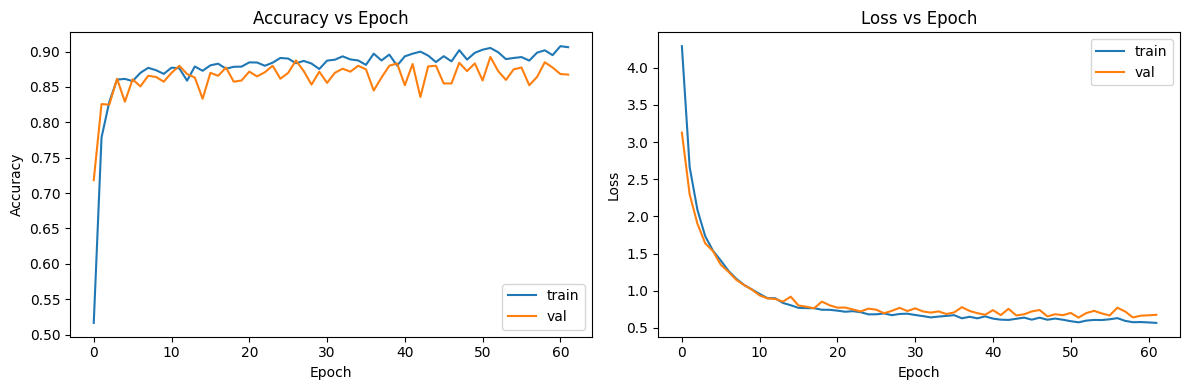

In [20]:
plotHistory(Tuning_model1_L1L2)

### Model 1 with Batch Normalization

In [22]:
model1_bn = Sequential()
model1_bn.add(Dense(100, input_shape=(x_train_small.shape[1],)))
model1_bn.add(BatchNormalization())
model1_bn.add(Activation('relu'))              
model1_bn.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model1_bn.keras', monitor='val_loss', verbose=0, save_best_only=True)


model1_bn.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])


Tuning_model1_bn = model1_bn.fit(
    x_train_small, y_train_small,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6896 - loss: 1.0333 - val_accuracy: 0.5892 - val_loss: 1.1585
Epoch 2/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9201 - loss: 0.3132 - val_accuracy: 0.8208 - val_loss: 0.5700
Epoch 3/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9436 - loss: 0.2221 - val_accuracy: 0.8783 - val_loss: 0.4224
Epoch 4/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.1675 - val_accuracy: 0.7800 - val_loss: 0.7164
Epoch 5/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9703 - loss: 0.1330 - val_accuracy: 0.8475 - val_loss: 0.5256
Epoch 6/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9778 - loss: 0.1014 - val_accuracy: 0.8733 - val_loss: 0.4312
Epoch 7/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9829 - loss: 0.0837 - val_accuracy: 0.8950 - val_loss: 0.3572
Epoch 8/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9901 - loss: 0.0669 - val_accu

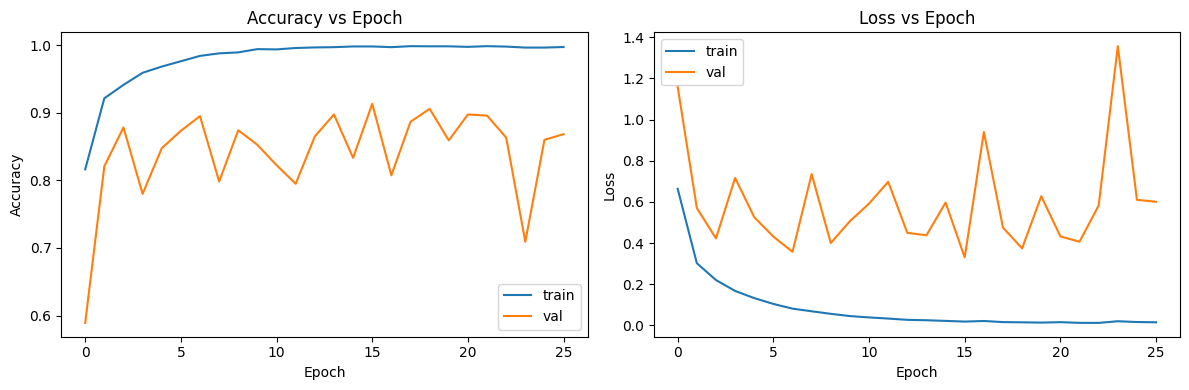

In [23]:
plotHistory(Tuning_model1_bn)

### Results

In [81]:
# Summary of best validation metrics for each model
results_1 = {
    'Baseline': {
        'val_accuracy': max(Tuning_model1.history['val_accuracy']),
        'val_loss': min(Tuning_model1.history['val_loss']),
    },
    "Dropout" : {
        'val_accuracy': max(Tuning_model1_dropout.history['val_accuracy']),
        'val_loss': min(Tuning_model1_dropout.history['val_loss']),
    },
    'L1': {
        'val_accuracy': max(Tuning_model1_L1.history['val_accuracy']),
        'val_loss': min(Tuning_model1_L1.history['val_loss']),
    },
    'L2': {
        'val_accuracy': max(Tuning_model1_L2.history['val_accuracy']),
        'val_loss': min(Tuning_model1_L2.history['val_loss']),
    },
    'L1+L2': {
        'val_accuracy': max(Tuning_model1_L1L2.history['val_accuracy']),
        'val_loss': min(Tuning_model1_L1L2.history['val_loss']),
    },
    'BatchNorm': {
        'val_accuracy': max(Tuning_model1_bn.history['val_accuracy']),
        'val_loss': min(Tuning_model1_bn.history['val_loss']),
    }
}

pd.DataFrame(results_1).T.round(3)


,val_accuracy,val_loss
Baseline,0.928,0.305
Dropout,0.912,0.321
L1,0.904,0.596
L2,0.913,0.401
L1+L2,0.892,0.640
BatchNorm,0.913,0.330


## Model 2 with 3 Hidden Layers

### Model 2 Baseline

In [28]:
model2 = Sequential()
model2.add(Dense(500, activation = 'relu', input_shape=(x_train_small.shape[1],)))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)
checkpoint = ModelCheckpoint("best_model2_baseline.keras",monitor='val_loss',verbose=0,save_best_only=True)

model2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model2 = model2.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)


Epoch 1/150


C:\Users\mrj13\anaconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4016 - loss: 1.7478 - val_accuracy: 0.7850 - val_loss: 0.6838
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8163 - loss: 0.5650 - val_accuracy: 0.8550 - val_loss: 0.4849
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8666 - loss: 0.4336 - val_accuracy: 0.8900 - val_loss: 0.3814
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8879 - loss: 0.3540 - val_accuracy: 0.8725 - val_loss: 0.4014
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9061 - loss: 0.3000 - val_accuracy: 0.8925 - val_loss: 0.3610
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9027 - loss: 0.2934 - val_accuracy: 0.8892 - val_loss: 0.3370
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9143 - loss: 0.2588 - val_accuracy: 0.8958 - val_loss: 0.3375
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9251 - loss: 0.2250 - val_accuracy: 0.9083 - val_l

### Model 2 with Dropout

In [30]:
model2_dropout = Sequential()
model2_dropout.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],)))
model2_dropout.add(Dropout(0.25))
model2_dropout.add(Dense(500,activation='relu'))
model2_dropout.add(Dropout(0.25))
model2_dropout.add(Dense(500,activation='relu'))
model2_dropout.add(Dropout(0.25))
model2_dropout.add(Dense(10))
model2_dropout.add(Activation('softmax'))


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)
checkpoint = ModelCheckpoint("best_model2_dropout.keras",monitor='val_loss',verbose=0,save_best_only=True)

model2_dropout.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model2_dropout = model2_dropout.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2833 - loss: 2.0263 - val_accuracy: 0.7300 - val_loss: 0.7714
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7170 - loss: 0.8419 - val_accuracy: 0.8225 - val_loss: 0.5650
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7997 - loss: 0.6182 - val_accuracy: 0.8550 - val_loss: 0.4545
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8264 - loss: 0.5440 - val_accuracy: 0.8675 - val_loss: 0.4403
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8191 - loss: 0.5391 - val_accuracy: 0.8525 - val_loss: 0.4579
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8509 - loss: 0.4622 - val_accuracy: 0.8742 - val_loss: 0.3877
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8487 - loss: 0.4587 - val_accuracy: 0.8708 - val_loss: 0.4239
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8447 - loss: 0.4667 - val_accuracy: 0.

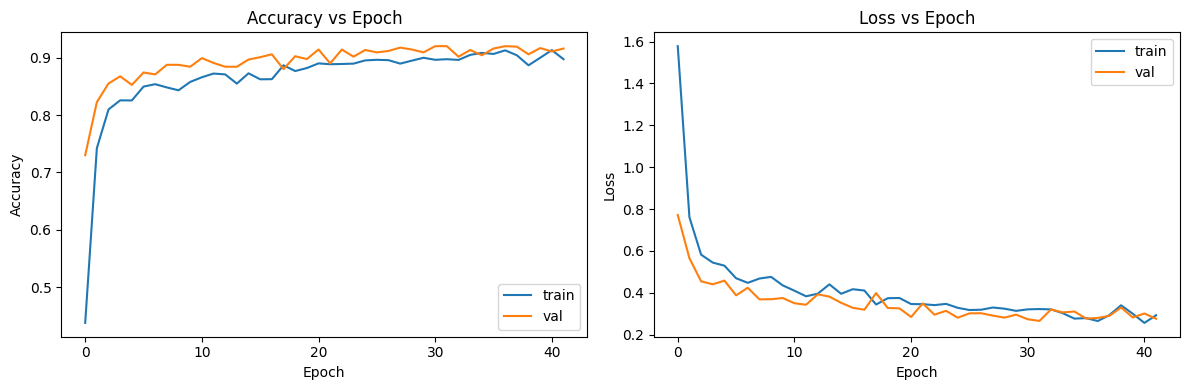

In [31]:
plotHistory(Tuning_model2_dropout)

### Model 2 with L1 Regularization

In [33]:
model2_L1 = Sequential()
model2_L1.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l1(0.001)))
model2_L1.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model2_L1.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model2_L1.add(Dense(10))
model2_L1.add(Activation('softmax'))


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)
checkpoint = ModelCheckpoint("best_model2_L1.keras",monitor='val_loss',verbose=0,save_best_only=True)

model2_L1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model2_L1 = model2_L1.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4040 - loss: 26.3893 - val_accuracy: 0.7992 - val_loss: 9.4504
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7762 - loss: 8.1081 - val_accuracy: 0.8133 - val_loss: 5.4705
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8143 - loss: 5.0403 - val_accuracy: 0.8292 - val_loss: 3.9803
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8300 - loss: 3.6872 - val_accuracy: 0.7692 - val_loss: 3.2029
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8191 - loss: 2.9098 - val_accuracy: 0.8425 - val_loss: 2.4089
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8600 - loss: 2.2840 - val_accuracy: 0.8233 - val_loss: 2.0883
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8533 - loss: 1.9421 - val_accuracy: 0.8333 - val_loss: 1.7699
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8335 - loss: 1.7377 - val_accuracy: 0

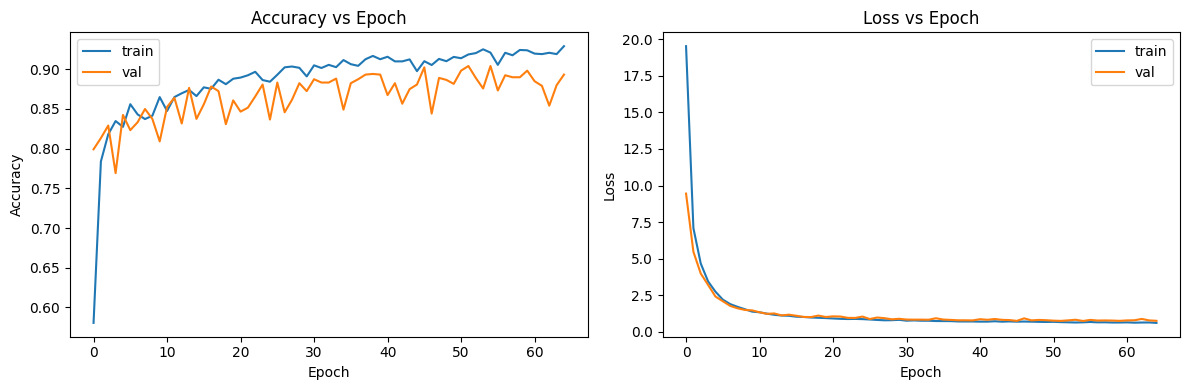

In [34]:
plotHistory(Tuning_model2_L1)

### Model 2 with L2 Regularization

In [36]:
model2_L2 = Sequential()
model2_L2.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
model2_L2.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2_L2.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2_L2.add(Dense(10))
model2_L2.add(Activation('softmax'))


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)
checkpoint = ModelCheckpoint("best_model2_L2.keras",monitor='val_loss',verbose=0,save_best_only=True)

model2_L2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model2_L2 = model2_L2.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4147 - loss: 2.9887 - val_accuracy: 0.7858 - val_loss: 1.4507
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8276 - loss: 1.2961 - val_accuracy: 0.8225 - val_loss: 1.2012
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8583 - loss: 1.0778 - val_accuracy: 0.8742 - val_loss: 0.9729
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8787 - loss: 0.9368 - val_accuracy: 0.8700 - val_loss: 0.9296
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8985 - loss: 0.8191 - val_accuracy: 0.8842 - val_loss: 0.8382
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9100 - loss: 0.7650 - val_accuracy: 0.8883 - val_loss: 0.7889
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9094 - loss: 0.7353 - val_accuracy: 0.8442 - val_loss: 0.8937
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9036 - loss: 0.7068 - val_accuracy: 0.

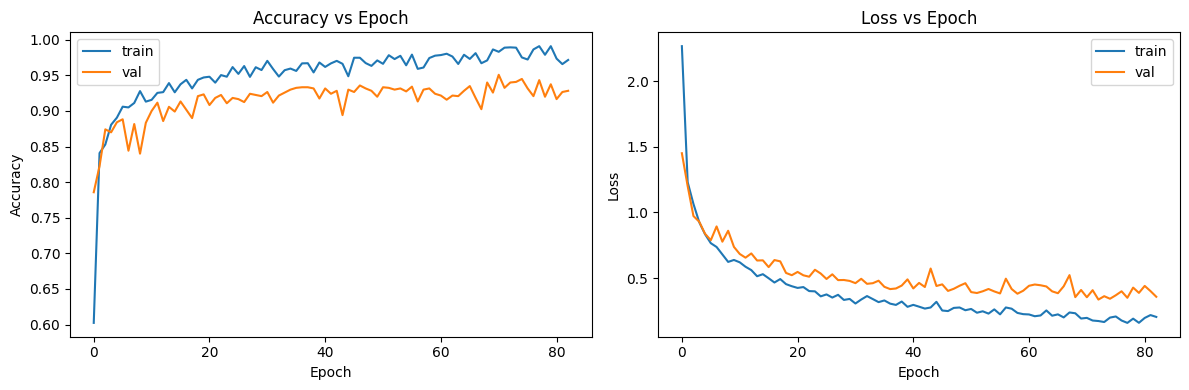

In [37]:
plotHistory(Tuning_model2_L2)

### Model 2 with L1 and L2 Regularization

In [39]:
model2_L1L2 = Sequential()
model2_L1L2.add(Dense(500,activation='relu',input_shape=(x_train_small.shape[1],),kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model2_L1L2.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model2_L1L2.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model2_L1L2.add(Dense(10))
model2_L1L2.add(Activation('softmax'))


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)
checkpoint = ModelCheckpoint("best_model2_L1L2.keras",monitor='val_loss',verbose=0,save_best_only=True)

model2_L1L2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])

Tuning_model2_L1L2 = model2_L1L2.fit(
    x_train_small, y_train_small,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4138 - loss: 26.8990 - val_accuracy: 0.7500 - val_loss: 8.9617
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7952 - loss: 7.5690 - val_accuracy: 0.7783 - val_loss: 5.3019
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8123 - loss: 4.8003 - val_accuracy: 0.8408 - val_loss: 3.7573
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8545 - loss: 3.4797 - val_accuracy: 0.8367 - val_loss: 2.9290
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8468 - loss: 2.7386 - val_accuracy: 0.8433 - val_loss: 2.3487
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8424 - loss: 2.2370 - val_accuracy: 0.8325 - val_loss: 2.0240
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8280 - loss: 1.9460 - val_accuracy: 0.8617 - val_loss: 1.7059
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8545 - loss: 1.6665 - val_accuracy: 0

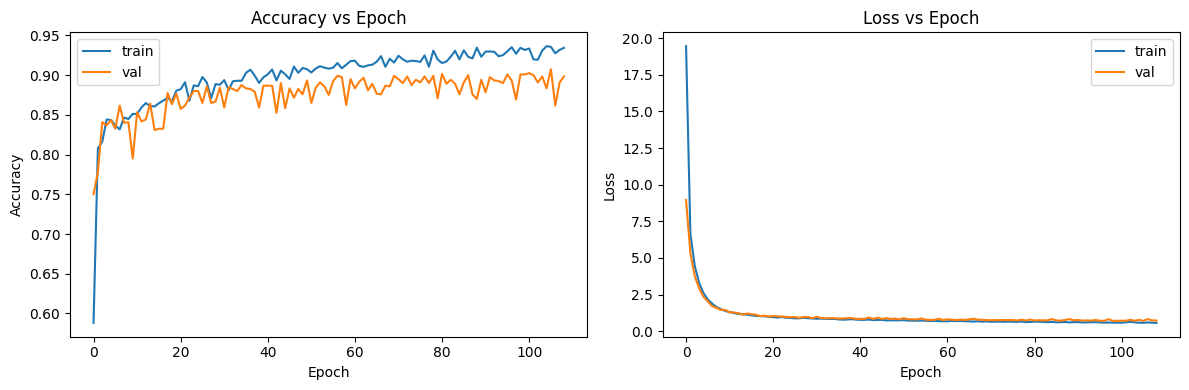

In [40]:
plotHistory(Tuning_model2_L1L2)

### Model 2 with Batch Normalization

In [42]:
model2_bn = Sequential()
model2_bn.add(Dense(500, input_shape=(x_train_small.shape[1],)))
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu')) 
model2_bn.add(Dense(500))
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu')) 
model2_bn.add(Dense(500))
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu')) 

model2_bn.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model2_bn.keras', monitor='val_loss', verbose=0, save_best_only=True)


model2_bn.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(0.001), 
    metrics=['accuracy'])


Tuning_model2_bn = model2_bn.fit(
    x_train_small, y_train_small,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7784 - loss: 0.6582 - val_accuracy: 0.5892 - val_loss: 1.4859
Epoch 2/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9469 - loss: 0.1627 - val_accuracy: 0.7975 - val_loss: 0.7333
Epoch 3/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9730 - loss: 0.0851 - val_accuracy: 0.7900 - val_loss: 1.0163
Epoch 4/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9848 - loss: 0.0537 - val_accuracy: 0.9083 - val_loss: 0.3517
Epoch 5/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.7992 - val_loss: 0.9993
Epoch 6/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9840 - loss: 0.0487 - val_accuracy: 0.8442 - val_loss: 0.7103
Epoch 7/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9883 - loss: 0.0389 - val_accuracy: 0.8875 - val_loss: 0.5393
Epoch 8/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9829 - loss: 0.0436 - 

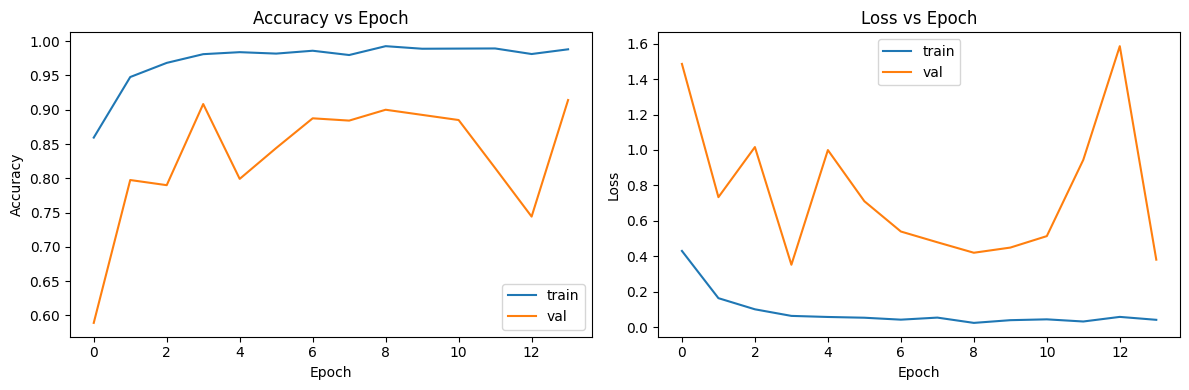

In [43]:
plotHistory(Tuning_model2_bn)

In [83]:
# Summary of best validation metrics for each model
results_2 = {
    'Baseline': {
        'val_accuracy': max(Tuning_model2.history['val_accuracy']),
        'val_loss': min(Tuning_model2.history['val_loss']),
    },
    "Dropout" : {
        'val_accuracy': max(Tuning_model1_dropout.history['val_accuracy']),
        'val_loss': min(Tuning_model1_dropout.history['val_loss']),
    },
    'L1': {
        'val_accuracy': max(Tuning_model2_L1.history['val_accuracy']),
        'val_loss': min(Tuning_model2_L1.history['val_loss']),
    },
    'L2': {
        'val_accuracy': max(Tuning_model2_L2.history['val_accuracy']),
        'val_loss': min(Tuning_model2_L2.history['val_loss']),
    },
    'L1+L2': {
        'val_accuracy': max(Tuning_model2_L1L2.history['val_accuracy']),
        'val_loss': min(Tuning_model2_L1L2.history['val_loss']),
    },
    'BatchNorm': {
        'val_accuracy': max(Tuning_model2_bn.history['val_accuracy']),
        'val_loss': min(Tuning_model2_bn.history['val_loss']),
    }
}

pd.DataFrame(results_2).T.round(3)

,val_accuracy,val_loss
Baseline,0.942,0.235
Dropout,0.912,0.321
L1,0.904,0.736
L2,0.951,0.337
L1+L2,0.908,0.698
BatchNorm,0.914,0.352


In [85]:
# Combine validation results into one dictionary
val_metrics = {
    'Model 1': {
        'Baseline': results_1['Baseline'],
        'Dropout': results_1['Dropout'],
        'L1': results_1['L1'],
        'L2': results_1['L2'],
        'L1+L2': results_1['L1+L2'],
        'BatchNorm': results_1['BatchNorm'],
    },
    'Model 2': {
        'Baseline': results_2['Baseline'],
        'Dropout': results_2['Dropout'],
        'L1': results_2['L1'],
        'L2': results_2['L2'],
        'L1+L2': results_2['L1+L2'],
        'BatchNorm': results_2['BatchNorm'],
    }
}

In [101]:
model_test_1 = [model1, model1_dropout, model1_L1, model1_L2, model1_L1L2, model1_bn]
model_names_1 = ['Baseline', 'Dropout', 'L1', 'L2', 'L1+L2', 'BatchNorm']

model_test_2 = [model2, model2_dropout, model2_L1, model2_L2, model2_L1L2, model2_bn]
model_names_2 = ['Baseline', 'Dropout', 'L1', 'L2', 'L1+L2', 'BatchNorm']


def evaluate_models(model_list, model_names, model_type):
    results = []
    for model, name in zip(model_list, model_names):
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
        val_data = val_metrics[model_type][name]
        results.append({
            model_type: name,
            'Val Accuracy': round(val_data['val_accuracy'], 3),
            'Val Loss': round(val_data['val_loss'], 3),
            'Test Accuracy': round(accuracy, 3),
            'Test Loss': round(loss, 3),
        })
    return pd.DataFrame(results)

### Full Train and Test Results

In [103]:
evaluate_models(model_test_1, model_names_1, "Model 1")

,Model 1,Val Accuracy,Val Loss,Test Accuracy,Test Loss
0,Baseline,0.928,0.305,0.934,0.331
1,Dropout,0.912,0.321,0.915,0.288
2,L1,0.904,0.596,0.893,0.612
3,L2,0.913,0.401,0.908,0.406
4,L1+L2,0.892,0.640,0.874,0.646
5,BatchNorm,0.913,0.330,0.865,0.534


In [97]:
evaluate_models(model_test_2, model_names_2, "Model 2")

,Model 2,Test Accuracy,Test Loss,Val Accuracy,Val Loss
0,Baseline,0.938,0.254,0.942,0.235
1,Dropout,0.922,0.252,0.912,0.321
2,L1,0.900,0.692,0.904,0.736
3,L2,0.943,0.327,0.951,0.337
4,L1+L2,0.907,0.668,0.908,0.698
5,BatchNorm,0.925,0.316,0.914,0.352
